<a href="https://colab.research.google.com/github/Sherine-6600/DSML-Projects/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width="100%">
    <tr>
        <td width="40%">
            <img src="https://t3.ftcdn.net/jpg/04/81/76/22/360_F_481762281_Xcvl3QsGh1pBMvQuyKIoIqq8aYksXEwX.jpg" >
        </td>
    </tr>
</table>

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

  

In [ ]:
!gdown 1XvSrR4f9dgxU2mehGUhJPsWgm4V2BcrCvaVhzyq6BLY

Downloading...
From (original): https://drive.google.com/uc?id=1XvSrR4f9dgxU2mehGUhJPsWgm4V2BcrCvaVhzyq6BLY
From (redirected): https://docs.google.com/spreadsheets/d/1XvSrR4f9dgxU2mehGUhJPsWgm4V2BcrCvaVhzyq6BLY/export?format=xlsx
To: /content/netflix.xlsx
1.74MB [00:00, 135MB/s]


The dataset provided consists of a list of all the TV shows/movies available on Netflix:

***Show_id***: Unique ID for every Movie / Tv Show

***Type***: Identifier - A Movie or TV Show

***Title***: Title of the Movie / Tv Show

***Director***: Director of the Movie

***Cast***: Actors involved in the movie/show

***Country***: Country where the movie/show was produced

***Date_added***: Date it was added on Netflix

***Release_year***: Actual Release year of the movie/show

***Rating***: TV Rating of the movie/show

***Duration***: Total Duration - in minutes or number of seasons

***Listed_in***: Genre

***Description***: The summary description

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_df = pd.read_excel('netflix.xlsx')
raw_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
len(raw_df)

8807

In [ ]:
raw_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
raw_df.ndim

2

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
raw_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
raw_df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

##Fill NAN for DATE ADDED column

In [ ]:
raw_df[raw_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
month = raw_df['date_added'].dt.month.mean().round().astype(int).astype(str)
month

'7'

In [ ]:
day = raw_df['date_added'].dt.day.mean().round().astype(int).astype(str)
day

'12'

In [ ]:
raw_df.loc[raw_df['date_added'].isna(),'date_added'] = pd.to_datetime(raw_df['release_year'].astype(str) +  month + day , format='%Y%m%d')

In [ ]:
raw_df.iloc[[7254,6795]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2012-07-12,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2003-07-12,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


###Fill NaN for DURATION column

In [ ]:
raw_df[raw_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
raw_df.loc[raw_df['duration'].isna(),'duration'] = raw_df[raw_df['duration'].isna()]['rating']

In [ ]:
raw_df.iloc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


###Fill NaN for RATING column


In [ ]:
raw_df[raw_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
raw_df[raw_df['type'] == 'Movie']['rating'].value_counts().reset_index().iloc[0,0]

'TV-MA'

In [ ]:
raw_df[raw_df['type'] == 'TV Show']['rating'].value_counts().reset_index().iloc[0,0]

'TV-MA'

In [ ]:
rating_NaN = 'TV-MA'

In [ ]:
raw_df.loc[raw_df['rating'].isna(),'rating'] = rating_NaN

In [ ]:
raw_df[raw_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


###RATING column has MIN

In [ ]:
raw_df[raw_df['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
raw_df.loc[raw_df['rating'].str.contains('min'),'rating'] = rating_NaN

In [ ]:
rating_NaN

'TV-MA'

In [ ]:
raw_df[raw_df['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


###Fill NaN for DIRECTOR, COUNTRY and CAST column .

In [ ]:
raw_df[(raw_df['director'].isna()) & (raw_df['cast'].isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
...,...,...,...,...,...,...,...,...,...,...,...,...
8605,s8606,TV Show,Top Grier,NaN,NaN,United States,2018-12-31,2018,TV-MA,3 Seasons,Reality TV,Social media star Hayes Grier returns to North...
8609,s8610,TV Show,Towies,NaN,NaN,NaN,2017-12-27,2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...
8700,s8701,TV Show,Wartime Portraits,NaN,NaN,Poland,2016-09-15,2014,TV-MA,1 Season,"Docuseries, International TV Shows","Part live-action and part animation, this visu..."
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,2016-11-01,2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...


In [ ]:
raw_df.loc[raw_df['director'].isna(),'director'] = 'Unknown Director'

In [ ]:
raw_df.loc[raw_df['cast'].isna(),'cast'] = 'Unknown Actor'

In [ ]:
raw_df.loc[raw_df['country'].isna(),'country'] = 'Unknown'

In [ ]:
raw_df[(raw_df['cast'].isna()) | (raw_df['director'].isna()) | (raw_df['country'].isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
netflix_df = raw_df

In [ ]:
netflix_df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df.director.value_counts()

Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

###Netflix Data

In [ ]:
label=netflix_df['type'].value_counts().reset_index()['index']
val=netflix_df['type'].value_counts().reset_index()['type']

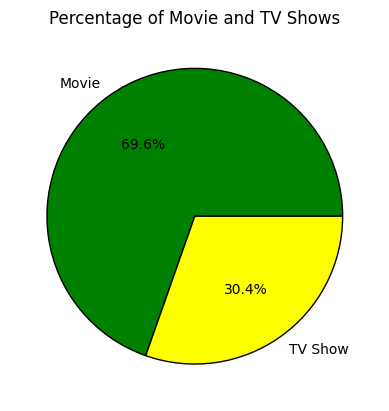

In [ ]:
plt.title('Percentage of Movie and TV Shows')
plt.pie(x=val,labels=label,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },colors=['green','yellow'],autopct='%1.1f%%')
plt.show()

In [ ]:
netflix_df["year_added"] = pd.to_datetime(netflix_df.date_added).dt.year
netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "added_year","year_added":"count"})
netflix_movies_df = netflix_df[netflix_df['type']=='Movie']
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index":"movie_added_year", "year_added":"count"})
netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show']
tvshows_year_df = netflix_tvshows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index":"tvshow_added_year", "year_added":"count"})

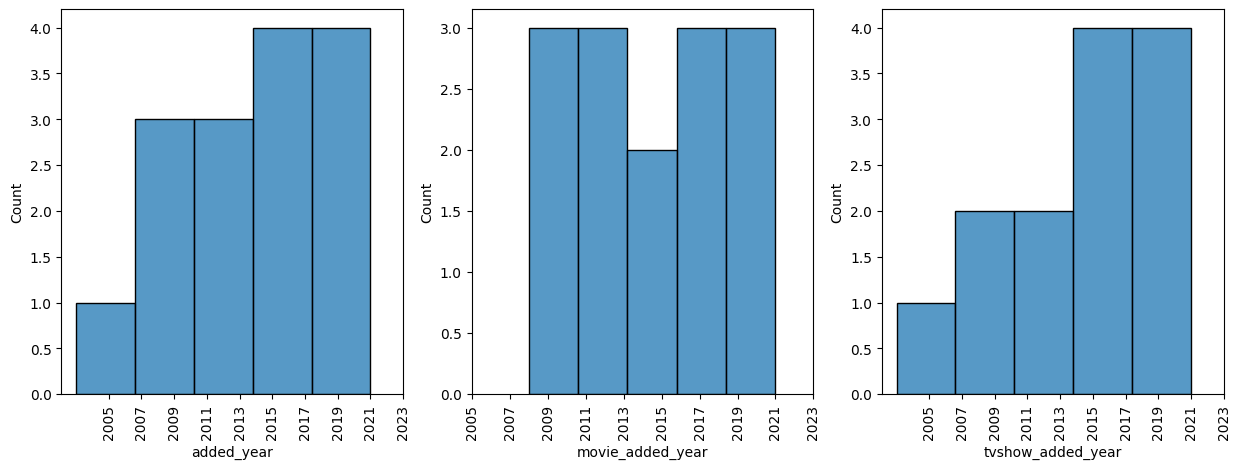

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=netflix_year_df, x='added_year')
plt.xticks(np.arange(2005, 2025, 2),rotation=90)
plt.subplot(1,3,2)
sns.histplot(data=movies_year_df, x='movie_added_year')
plt.xticks(np.arange(2005, 2025, 2),rotation=90)
plt.subplot(1,3,3)
sns.histplot (data=tvshows_year_df, x='tvshow_added_year')
plt.xticks(np.arange(2005, 2025, 2),rotation=90)
plt.savefig('content_added.png')
plt.show()

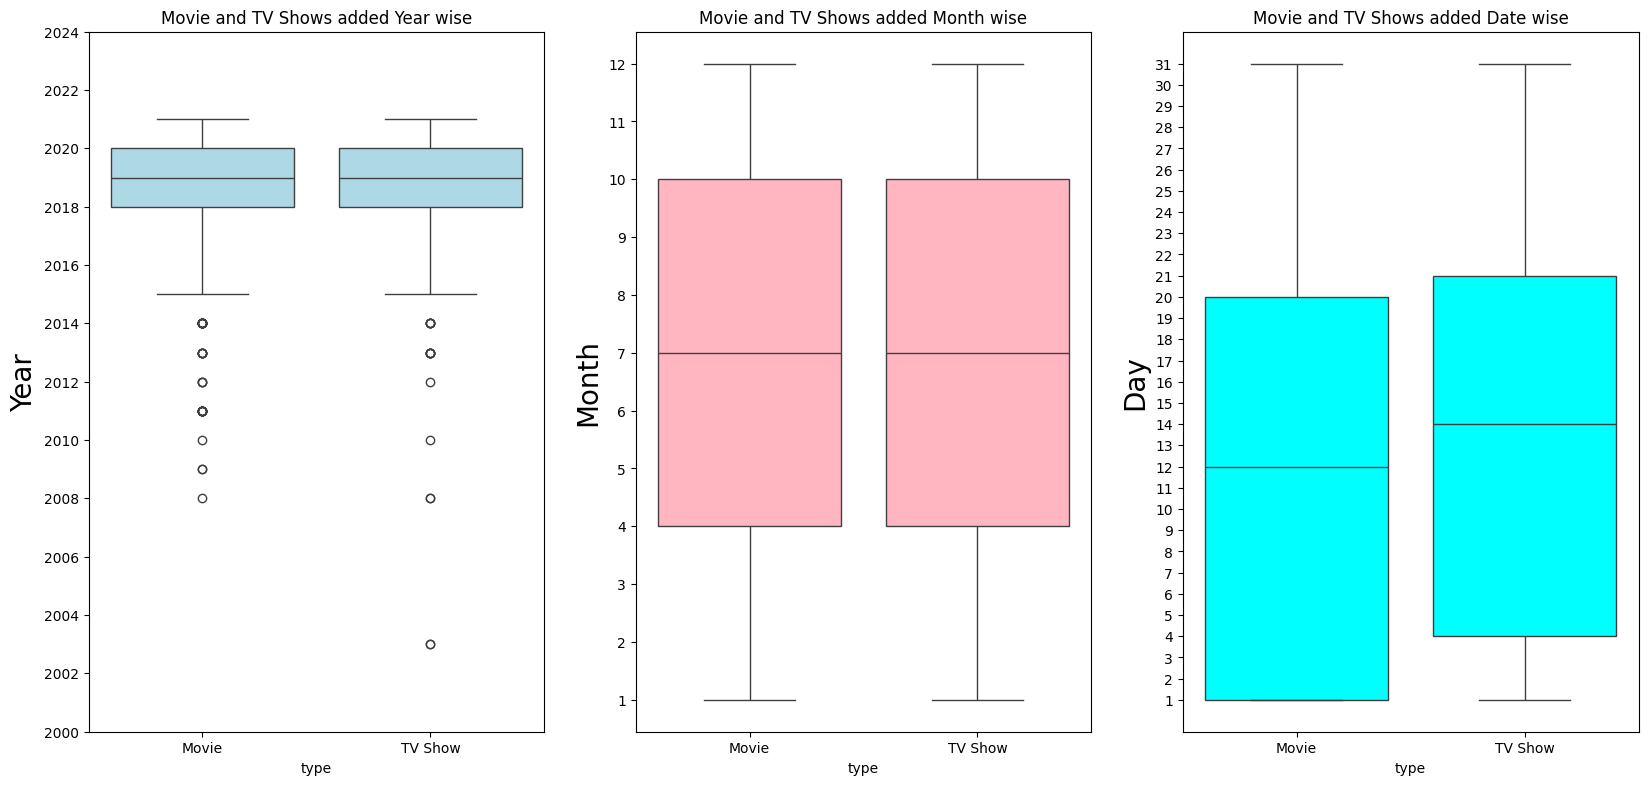

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.ylabel('Year',fontsize=20)
sns.boxplot(x='type',y=netflix_df['date_added'].dt.year, data=netflix_df,hue='type',patch_artist=True,boxprops = dict(facecolor ='lightblue'))
plt.ylim(bottom=2000,top=2024)
plt.yticks(np.arange(2000,2025,2))
plt.title('Movie and TV Shows added Year wise')
plt.subplot(2,3,2)
plt.ylabel('Month',fontsize=20)
sns.boxplot(x='type',y=netflix_df['date_added'].dt.month,data=netflix_df,hue='type',patch_artist=True,boxprops = dict(facecolor ='lightpink'))
plt.yticks(np.arange(1,13,1))
plt.title('Movie and TV Shows added Month wise')
plt.subplot(2,3,3)
plt.ylabel('Day',fontsize=20)
sns.boxplot(x='type',y=netflix_df['date_added'].dt.day,data=netflix_df,hue='type',patch_artist=True,boxprops = dict(facecolor ='aqua'))
plt.yticks(np.arange(1,32,1))
plt.title('Movie and TV Shows added Date wise')
plt.show()

In [ ]:
netflix_df["list_of_country"] = netflix_df["country"].apply(lambda x: str(x).split(', '))
netflix_df = netflix_df.explode("list_of_country")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,United States
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Unknown
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,India


In [ ]:
netflix_df["list_of_country"].value_counts().head(25).reset_index().head()

,index,list_of_country
0,United States,3689
1,India,1046
2,Unknown,831
3,United Kingdom,804
4,Canada,445


In [ ]:
netflix_df_country_10 = netflix_df[netflix_df["list_of_country"].isin(netflix_df["list_of_country"].value_counts().head(11).reset_index()['index'])]
netflix_df_country_10.drop(netflix_df_country_10[netflix_df_country_10['list_of_country']=='Unknown'].index,inplace=True)

<ipython-input-320-7831de89404d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
netflix_df_country_10_TV = netflix_df_country_10[netflix_df_country_10['type']=='TV Show']
netflix_df_country_10_Movie = netflix_df_country_10[netflix_df_country_10['type']=='Movie']

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
filtered_countries = netflix_df.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Unknown']
iplot([go.Choropleth(locationmode='country names',locations=filtered_countries,z=filtered_countries.value_counts())])

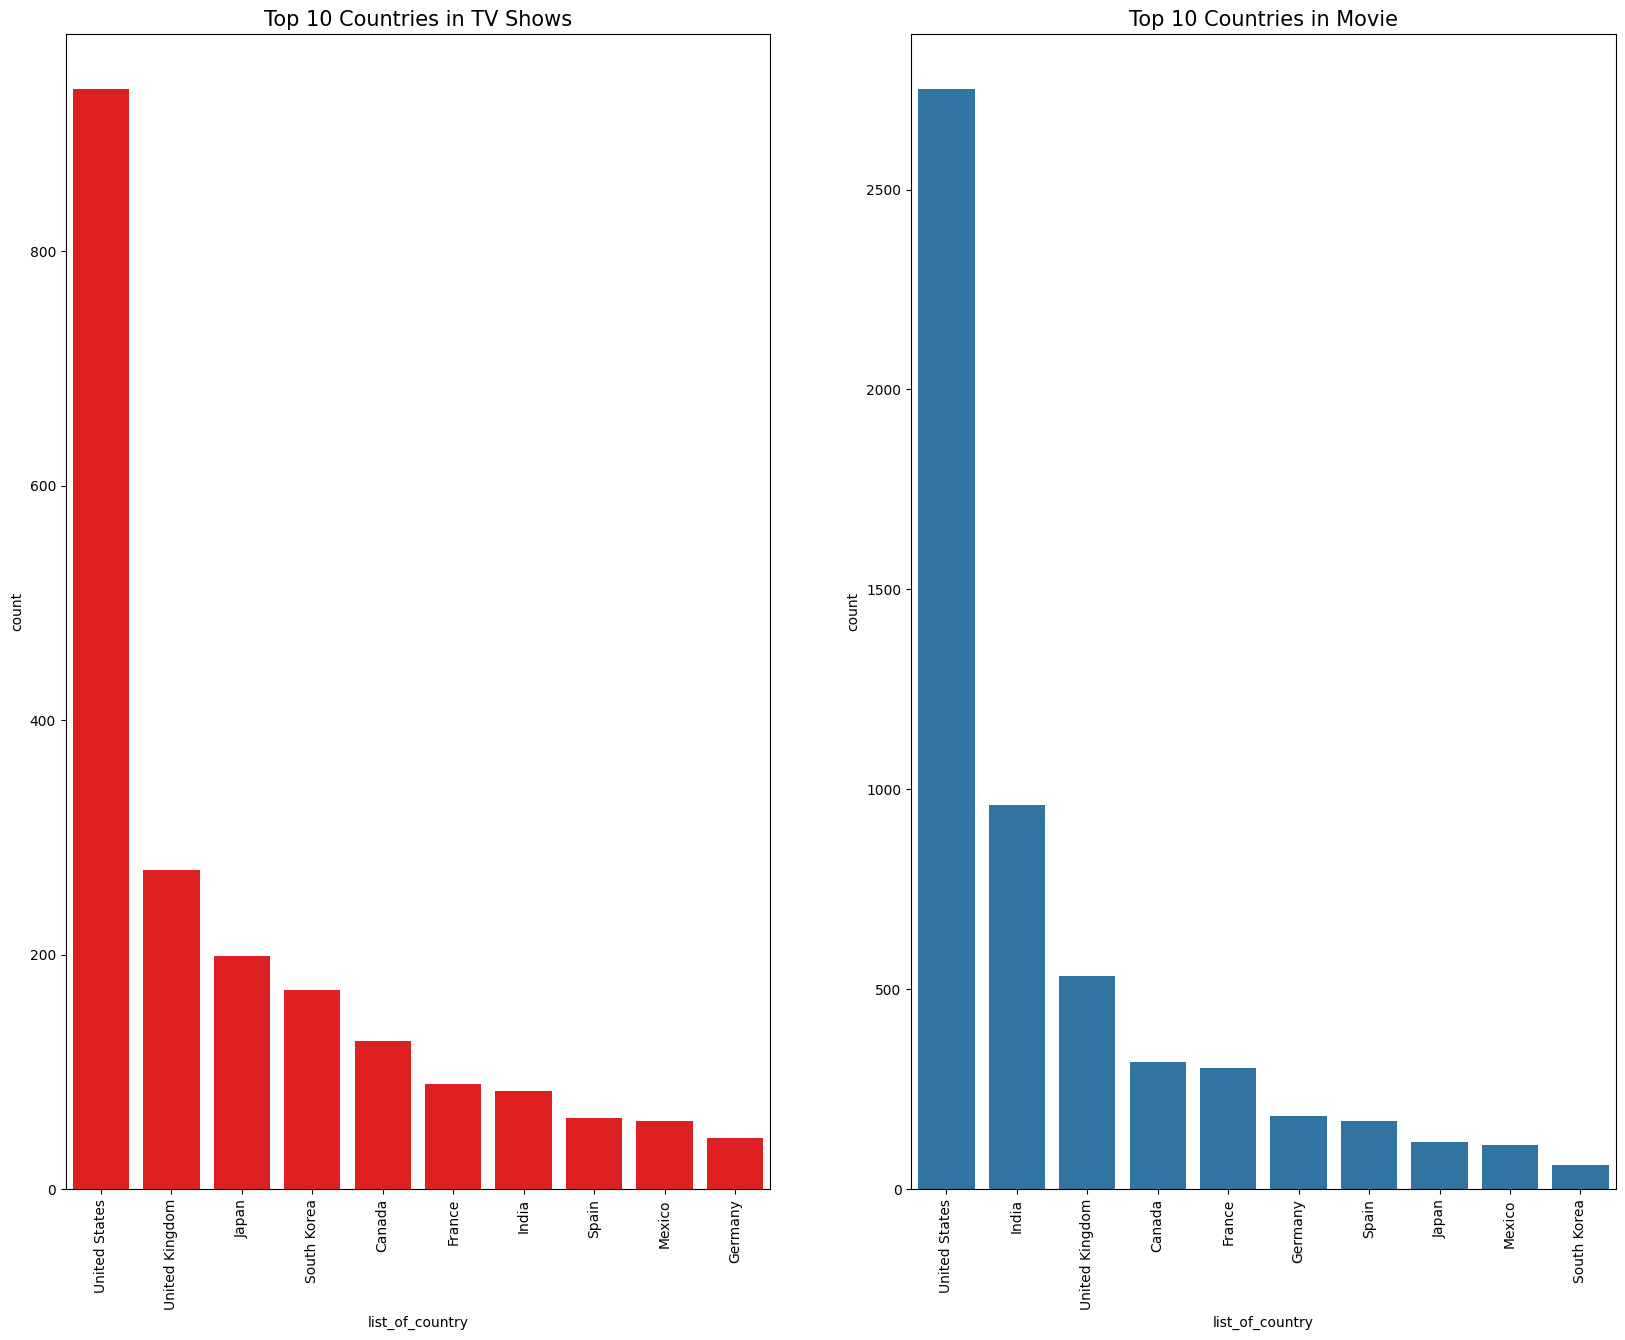

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.title('Top 10 Countries in TV Shows',fontsize=15)
plt.xticks(rotation=90)
sns.countplot(data=netflix_df_country_10_TV,x='list_of_country',color='red',order=netflix_df_country_10_TV['list_of_country'].value_counts().index)
plt.subplot(1,2,2)
plt.title('Top 10 Countries in Movie',fontsize=15)
plt.xticks(rotation=90)
sns.countplot(data=netflix_df_country_10_Movie,x='list_of_country',order=netflix_df_country_10_Movie['list_of_country'].value_counts().index)
plt.show()


In [ ]:
netflix_df["list_of_listed_in"] = netflix_df["listed_in"].apply(lambda x: str(x).split(','))
netflix_df = netflix_df.explode("list_of_listed_in")
netflix_df["list_of_listed_in"] = netflix_df["list_of_listed_in"].apply(lambda x: str(x).replace(' ',''))
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,list_of_country,list_of_listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,South Africa,InternationalTVShows
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,South Africa,TVDramas
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,South Africa,TVMysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Unknown,CrimeTVShows


In [ ]:
netflix_df.loc[netflix_df['list_of_listed_in'] == 'TVDramas','list_of_listed_in'] = 'Dramas'

In [ ]:
netflix_df['list_of_listed_in'].value_counts().head()

Dramas                  4051
InternationalMovies     3509
Comedies                1981
InternationalTVShows    1465
Action&Adventure        1182
Name: list_of_listed_in, dtype: int64

In [ ]:
labels_genre = netflix_df['list_of_listed_in'].value_counts().reset_index()['index'].head(10)
val_genre = netflix_df['list_of_listed_in'].value_counts().reset_index()['list_of_listed_in'].head(10)

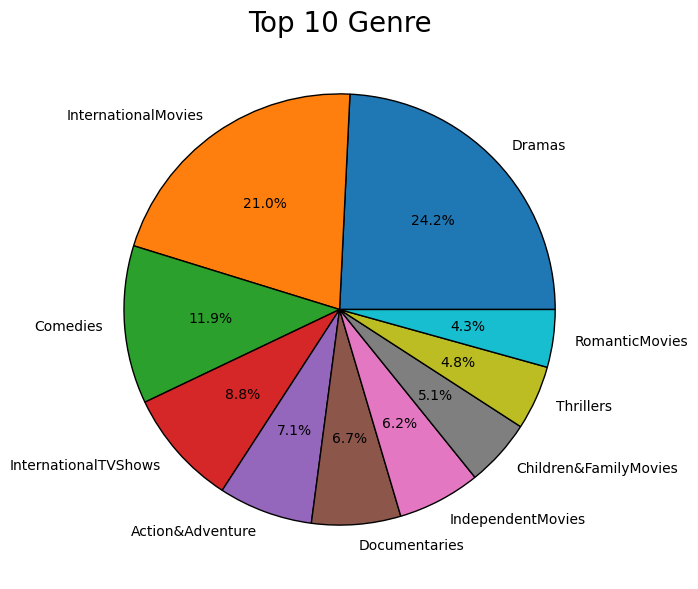

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Top 10 Genre',fontsize=20)
plt.pie(x=val_genre,labels=labels_genre,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },autopct='%1.1f%%')
plt.show()

In [ ]:
netflix_df_director_data = netflix_df[netflix_df['director'] != 'Unknown Director']
netflix_df_director_data['list_of_directors']=netflix_df_director_data['director'].apply(lambda x: str(x).split(', '))
netflix_df_director_data = netflix_df_director_data.explode("list_of_directors")
netflix_df_director_data['list_of_directors'].value_counts()

<ipython-input-329-3ae9b1d4a801>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
                       ..
Liz Plonka              1
Morgan Pehme            1
Daniel DiMauro          1
Dylan Bank              1
Kirsten Johnson         1
Name: list_of_directors, Length: 4993, dtype: int64

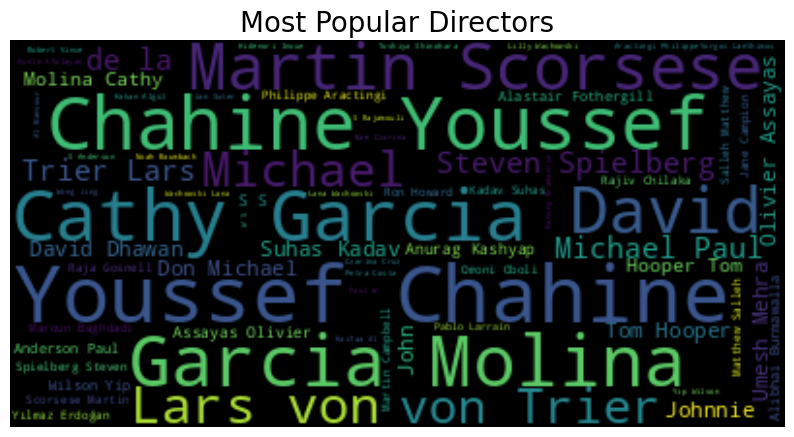

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
netflix_df_director = netflix_df[netflix_df['director'] != 'Unknown Director']
text = " ".join(str(each) for each in netflix_df_director.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(10,6))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 20)
plt.axis("off")
plt.show()

In [ ]:
movie_time_df = netflix_df[(netflix_df['type']=='Movie') & (netflix_df['duration'].isin(netflix_df[netflix_df['type']=='Movie']['duration'].value_counts().head(10).reset_index()['index']))]

In [ ]:
tvshow_time_df = netflix_df[(netflix_df['type']=='TV Show') & (netflix_df['duration'].isin(netflix_df[netflix_df['type']=='TV Show']['duration'].value_counts().head(10).reset_index()['index']))]

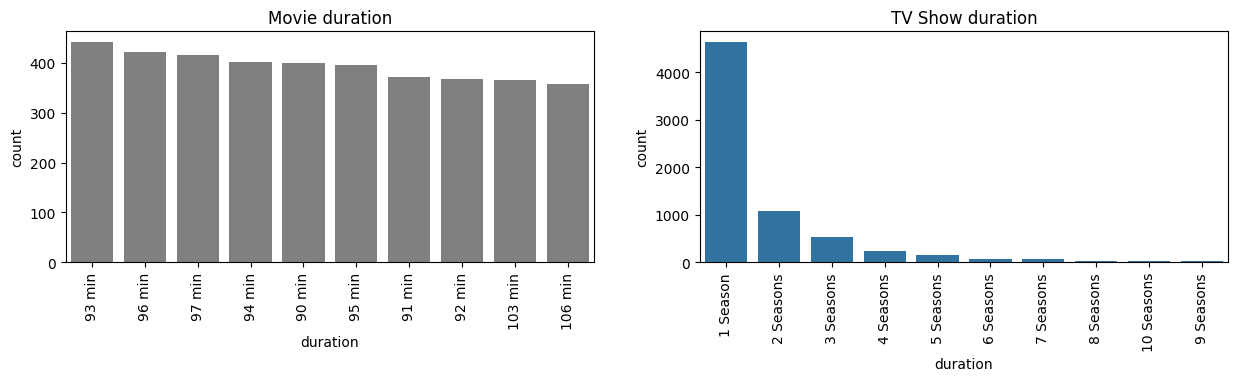

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title('Movie duration')
sns.countplot(data=movie_time_df,x='duration',order=movie_time_df['duration'].value_counts().index,color='grey')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('TV Show duration')
sns.countplot(data=tvshow_time_df,x='duration',order=tvshow_time_df['duration'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
netflix_df["list_of_cast"] = netflix_df["cast"].apply(lambda x: str(x).split(', '))
netflix_df = netflix_df.explode('list_of_cast')

In [ ]:
cast_df = netflix_df[netflix_df['list_of_cast']!='Unknown Actor']['list_of_cast'].value_counts().reset_index()

<Axes: >

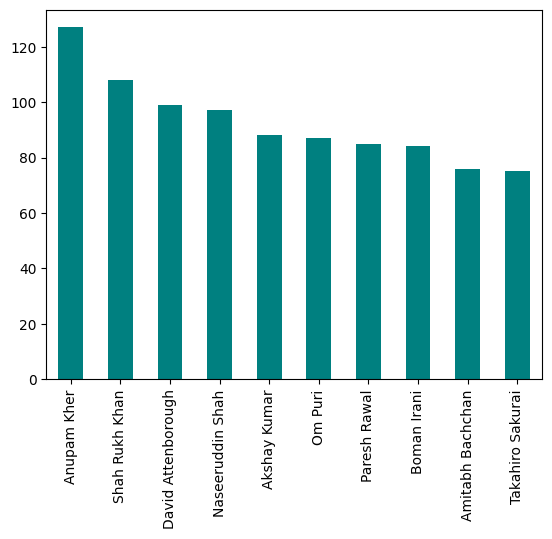

In [ ]:
netflix_df[netflix_df['list_of_cast']!='Unknown Actor']['list_of_cast'].value_counts().head(10).plot(kind='bar',color ='teal')


###Non-Graphical Analysis:

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'list_of_country', 'list_of_listed_in', 'list_of_cast'],
      dtype='object')

In [ ]:
netflix_df[netflix_df['type']=='Movie']['duration'].value_counts()

94 min     3591
97 min     3434
93 min     3356
95 min     3192
106 min    3052
           ... 
5 min         3
9 min         2
11 min        2
3 min         2
8 min         1
Name: duration, Length: 205, dtype: int64

In [ ]:
netflix_df[netflix_df['type']=='TV Show']['duration'].value_counts()

1 Season      33444
2 Seasons      9470
3 Seasons      5084
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [ ]:
netflix_df.year_added.value_counts().reset_index()

,index,year_added
0,2019,43126
1,2020,43023
2,2021,34007
3,2018,33413
4,2017,22765
5,2016,7641
6,2015,1260
7,2014,364
8,2011,303
9,2013,233


In [ ]:
netflix_df.rating.value_counts()

TV-MA       67698
TV-14       42028
R           23990
PG-13       15233
TV-PG       13778
PG           9011
TV-Y7        5792
TV-Y         3152
TV-G         2650
NR           1521
G            1151
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [ ]:
netflix_df.release_year.value_counts()

2018    22619
2019    20571
2017    18993
2020    18141
2016    17188
        ...  
1942        6
1947        4
1943        4
1946        3
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
netflix_df.list_of_country.value_counts().head(5)

United States     54219
India             21147
United Kingdom    12404
Unknown           11145
Japan              7940
Name: list_of_country, dtype: int64

In [ ]:
netflix_df.list_of_listed_in.value_counts()

Dramas                      36243
InternationalMovies         26129
Comedies                    18229
InternationalTVShows        12324
Action&Adventure            11124
IndependentMovies            8815
Children&FamilyMovies        7681
Thrillers                    6805
RomanticMovies               6159
TVComedies                   4856
CrimeTVShows                 4678
Kids'TV                      4552
HorrorMovies                 3965
Sci-Fi&Fantasy               3565
RomanticTVShows              3012
Music&Musicals               2829
AnimeSeries                  2313
TVAction&Adventure           2280
Spanish-LanguageTVShows      2098
Documentaries                2040
BritishTVShows               1798
SportsMovies                 1436
ClassicMovies                1374
TVMysteries                  1231
KoreanTVShows                1098
TVSci-Fi&Fantasy             1045
CultMovies                    960
TVHorror                      919
Docuseries                    801
LGBTQMovies   

In [ ]:
netflix_df[(netflix_df['type']=='TV Show') & (netflix_df['list_of_cast']!='Unknown Actor')]['list_of_cast'].value_counts()

David Attenborough    82
Takahiro Sakurai      55
Yuki Kaji             44
Ai Kayano             41
Junichi Suwabe        38
                      ..
Jonathan Adams         1
Julie McNiven          1
Alexa Alemanni         1
Mark Moses             1
Matt Lowe              1
Name: list_of_cast, Length: 14863, dtype: int64

In [ ]:
netflix_df[(netflix_df['type']=='Movie') & (netflix_df['list_of_cast']!='Unknown Actor')]['list_of_cast'].value_counts()

Anupam Kher         118
Shah Rukh Khan      108
Naseeruddin Shah     97
Akshay Kumar         88
Om Puri              87
                   ... 
David Pinard          1
Lee Su-geun           1
Um Sang-hyun          1
Alê Abreu             1
Hedy Lamarr           1
Name: list_of_cast, Length: 25951, dtype: int64

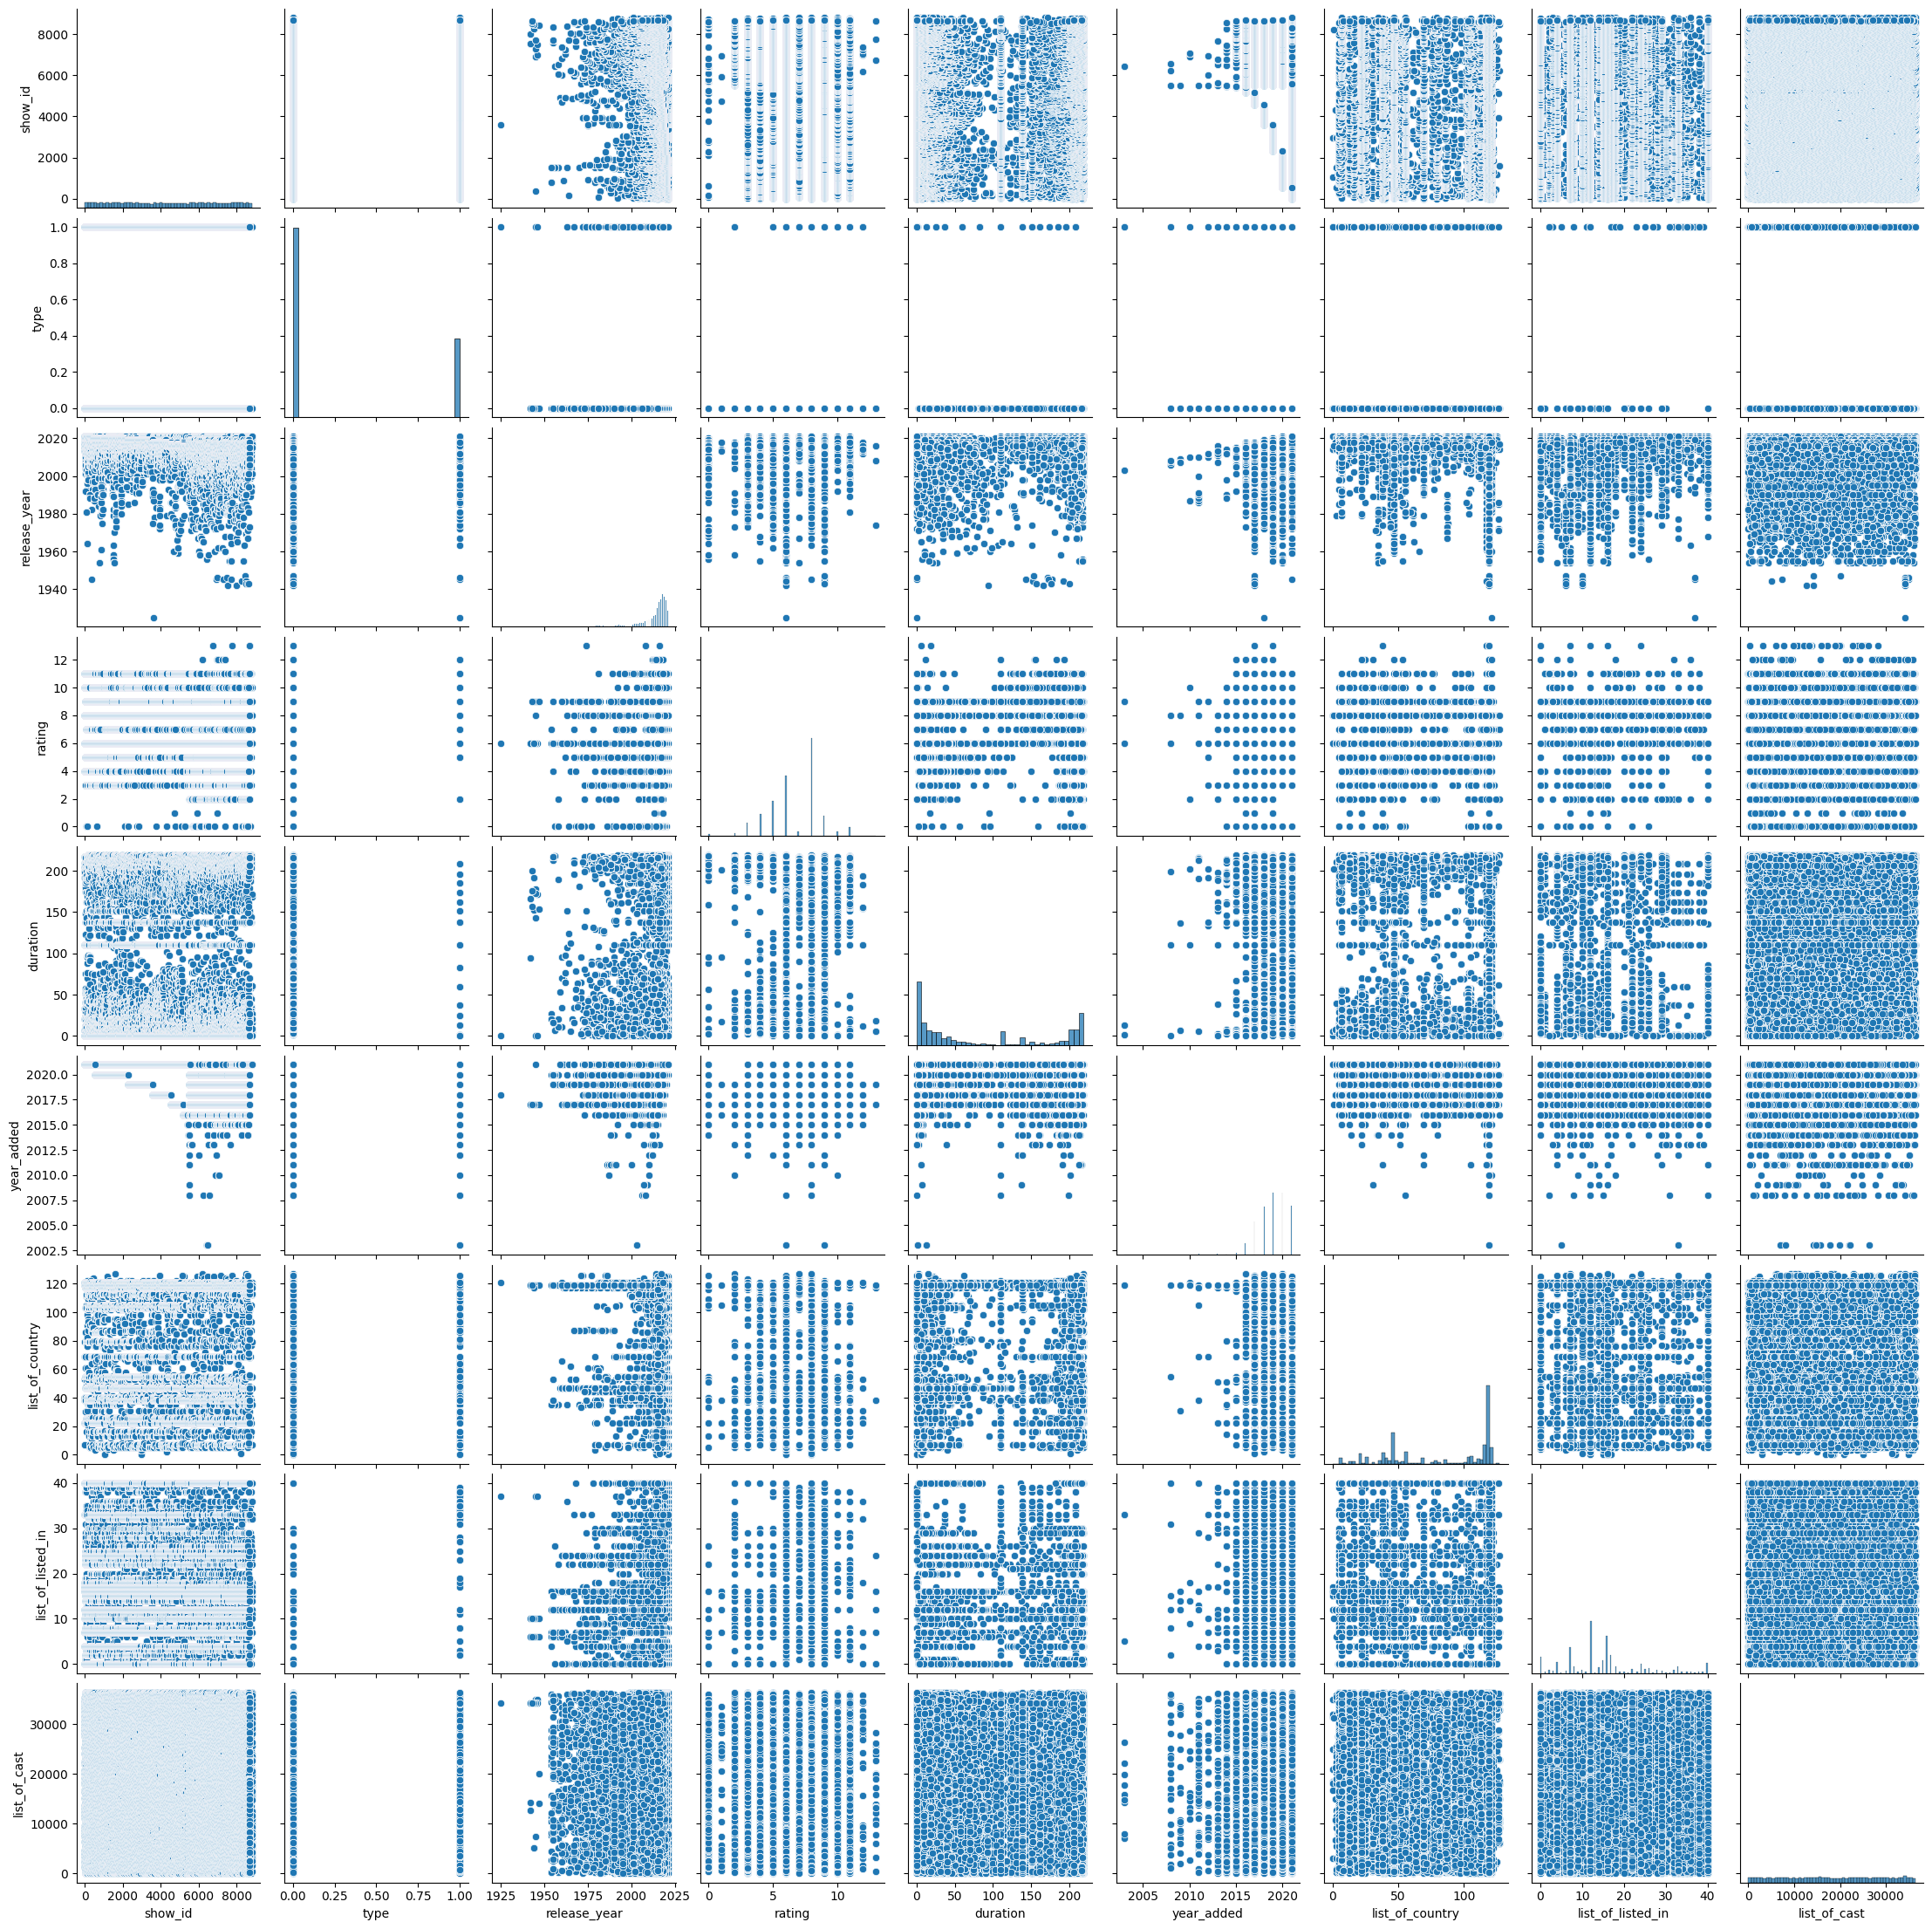

In [ ]:
sns.pairplot(data=netflix_df_updated)
plt.show()

In [ ]:
netflix_df_updated = netflix_df
netflix_df_updated['show_id'] = netflix_df['show_id'].astype('category').cat.codes
netflix_df_updated['list_of_country'] = netflix_df['list_of_country'].astype('category').cat.codes
netflix_df_updated['list_of_listed_in'] = netflix_df['list_of_listed_in'].astype('category').cat.codes
netflix_df_updated['type'] = netflix_df['type'].astype('category').cat.codes
netflix_df_updated['list_of_cast'] = netflix_df['list_of_cast'].astype('category').cat.codes
netflix_df_updated['rating'] = netflix_df['rating'].astype('category').cat.codes
netflix_df_updated['duration'] = netflix_df['duration'].astype('category').cat.codes
netflix_df_updated['rating'] = netflix_df['rating'].astype('category').cat.codes

In [ ]:
netflix_df_updated.corr()

<ipython-input-370-de42a2a4bba5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,show_id,type,release_year,rating,duration,year_added,list_of_country,list_of_listed_in,list_of_cast
show_id,1.000000,-0.159447,-0.242732,-0.177859,0.091461,-0.430801,0.051738,-0.053628,0.001151
type,-0.159447,1.000000,0.238799,0.354217,-0.257344,-0.020860,0.071120,0.258401,0.014122
release_year,-0.242732,0.238799,1.000000,0.293405,-0.013527,0.047520,-0.006214,0.141310,-0.009055
rating,-0.177859,0.354217,0.293405,1.000000,-0.047300,-0.086670,-0.086218,0.132730,0.017595
duration,0.091461,-0.257344,-0.013527,-0.047300,1.000000,-0.027154,0.049961,-0.081430,-0.025039
year_added,-0.430801,-0.020860,0.047520,-0.086670,-0.027154,1.000000,0.075530,-0.007131,-0.004649
list_of_country,0.051738,0.071120,-0.006214,-0.086218,0.049961,0.075530,1.000000,0.033676,-0.029037
list_of_listed_in,-0.053628,0.258401,0.141310,0.132730,-0.081430,-0.007131,0.033676,1.000000,-0.013431
list_of_cast,0.001151,0.014122,-0.009055,0.017595,-0.025039,-0.004649,-0.029037,-0.013431,1.000000


<ipython-input-371-ecac4bf571ea>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



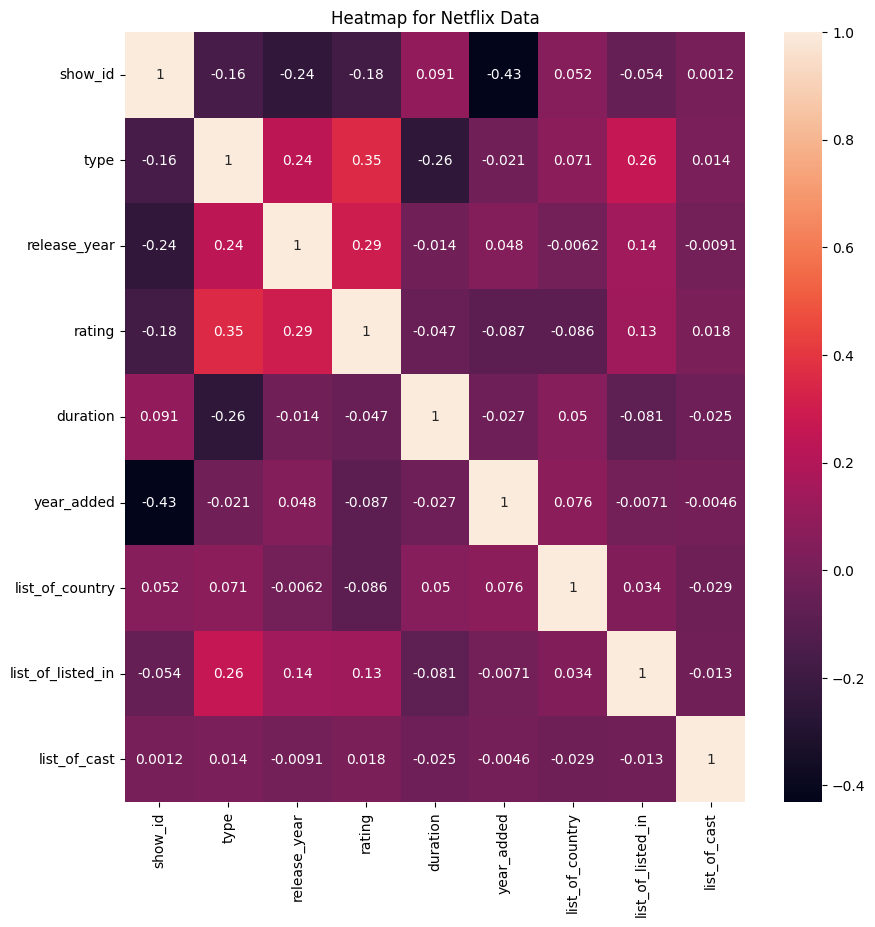

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Heatmap for Netflix Data')
sns.heatmap(netflix_df_updated.corr(),annot=True)
plt.show()


**Business Insights:**

By analysing the given data we can infer that,
1. Netflix has more Movie content than TV Shows.
2. It is also observed that in the recent day’s addition of TV Show content is more than the Movies
3. Netflix content is been directed by nearly 5k directors.
4. The Netflix has a wider range of content dating from 1925 till 2021.
5. We can observe that Dramas and International Movies genre holds a huge percentage in Netflix
content.
6. The average duration of Netflix Movie in the last 5 years is 82 min.
7. We can observe that most of the TV Show has 1 Season which might be because the director wanted
to convey a concise story within a single season rather than stretching it out over multiple seasons.
8. We can observe that 50% of the contents are added in the first 2 weeks. So the first 2 week might be
the ideal time for Netflix to add its content.
9. 50% of the contents are added in July month assuming the ideal month in which Netflix adds
content.
10. We can observe India holds the 7th place in producing TV Shows content whereas 2nd place in
producing Movie content.

**Recommendations:**

1. Netflix has more Movie content than TV Shows. We can use this for Marketing among the audience.
2. It is also observed that in the recent day’s addition of TV Show content is more than the Movies. This
will help them to position them in a better place among their competitors and maximize the
revenue.
3. Netflix can focus on adding content of other Genre as well to target wider audience.
4. The right time to add content in Netflix is in the first 2 week from the month of July to December.
5. Popular Movie Actor can do TV Show this helps TV Show to reach greater audience.
6. We can advertise in countries, in which the Movie and TV Shows content added is low.
7. Can focus on Actors or Directors who has done less TV Shows or Movies but with higher ratings.
8. We can release top Directors and Actors Movie and TV Shows directly in Netflix OTT. So this will
increase the Netflix subscribers.
9. Based on viewing preferences, demographics, and geographic location Netflix can focus on adding
Movie and TV Show content.
10. Netflix can also give free trial for 30 days.